#Univariate Linear Regression 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

## **Load the data**

* We are going to use ‘profits_and_populations_from_the_cities.csv’ CSV file
* File contains two columns, the first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

In [ ]:
df =pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/univariate_profits_and_populations_from_the_cities.csv')
df.head(5) # Show first 5 rows from datset

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
X = df.values[:,0] # Get input values from first column
y = df.values[:,1] # Get output values froms econd column
m = len(X)         # Total number training examples

print('X = ', X[: 5]) # Show first 5 records
print('y = ', y[: 5]) # Show first 5 records
print('m = ', m)

X =  [6.1101 5.5277 8.5186 7.0032 5.8598]
y =  [17.592   9.1302 13.662  11.854   6.8233]
m =  97


## **Understand The Data**
* Population of City in 10,000s and Profit in $10,000s. i.e. 10K is multiplier for each data point
* There are total 97 training examples (m= 97 or 97 no of rows)
* There is only one feature (one column of feature and one of label/target/y)
 
## **Data Visualization**
Let's assign the features(independent variables) values to variable X and target(dependent variable) values to variable y
For this dataset, we can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).
Many other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 2D plot
 



Text(0.5, 1.0, 'Scatter Plot Of Training Data')

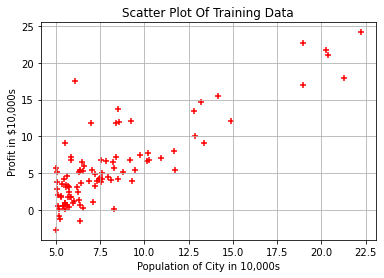

In [ ]:
plt.scatter(X,y, color='red',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Scatter Plot Of Training Data')

## **Which Sklearn Linear Regression Algorithm To Choose**
 
* Sklearn library have multiple linear regression algorithms
* Note: The way we have implemented the cost function and gradient descent algorithm every Sklearn algorithm also have some kind of mathematical model.
* Different algorithms are better suited for different types of data and type of problems
* The flow chart below will give you brief idea on how to choose right algorithm
 
  ![Choosing_Right_Sklearn_Linear_Model.png](https://raw.githubusercontent.com/satishgunjal/images/master/Choosing%20Right%20Sklearn%20Linear%20Model.png)
 



## **Ordinary Least Squares Algorithm**

* This is one of the most basic linear regression algorithm. 
* Mathematical formula used by ordinary least square algorithm is as below,

  ![ordinary_least_squares_formlua.png](https://github.com/satishgunjal/images/blob/master/ordinary_least_squares_formlua_1.png?raw=true)

* The objective of Ordinary Least Square Algorithm is to minimize the residual sum of squares. Here the term residual means 'deviation of predicted value(Xw) from actual value(y)'
* Problem with ordinary least square model is size of coefficients increase exponentially with increase in model complexity


In [ ]:
model_ols =  linear_model.LinearRegression()
model_ols.fit(X.reshape(m, 1),y) 
# fit() method is used for training the model
# Note the first parameter(feature) is must be 2D array(feature matrix). Using reshape function convert 'X' which is 1D array to 2D array of dimension 97x1
# Remember we don' thave to add column of 1 in X matrix, which is not required for sklearn library and we can avoid all that work

LinearRegression()

### **Understanding Training Results**
* Note: If training is successful then we get the result like above. Where all the default values used by LinearRgression() model are displayed. If required we can also pass these values in fit method. We are not going to change any of these values for now.
* As per our hypothesis function, 'model' object contains the coef and intercept values

In [ ]:
coef = model_ols.coef_
intercept = model_ols.intercept_
print('coef= ', coef)
print('intercept= ', intercept)

coef=  [1.19303364]
intercept=  -3.8957808783118484


You can compare above values with the values from [Univariate Linear Regression From Scratch With Python](http://satishgunjal.github.io/univariate_lr/) tutorial.
Remember the notation difference...
* coef(1.19303364) =  θ_1 (1.16636235)
* intercept(-3.89578087831185) =  θ_0(-3.63029144)
 
The values from our earlier model and Ordinary Least Squares model are not matching which is fine. Both models using different algorithm. Remember you have to choose the algorithm based on your data and problem type. And besides that this is just simple example with only 97 rows of data. 
 
Let's visualize the results..



### **Visualization**
* model.predict() method will give us the predicted values for our input values
* Lets plot the line using predicted values.

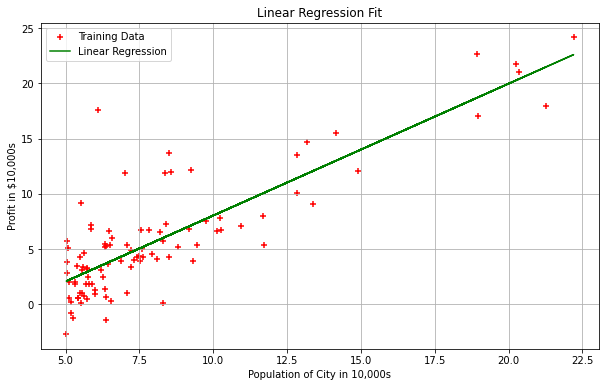

In [ ]:
plt.scatter(X, y, color='red', marker= '+', label= 'Training Data')
plt.plot(X, model_ols.predict(X.reshape(m, 1)), color='green', label='Linear Regression')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Linear Regression Fit')
plt.legend()

### **Testing the model**

* **Question: Predict the profit for population 35,000**

#### **Manual Calculations**

* Hypothesis function is $\hat{y}$(w, x) = w_0 + w_1 * x_1 
* Predicted values from model are,
  * θ_1(coef) = 1.19303364
  * θ_0(intercept) = -3.89578087831185
* x_1 = 3.5 (remember all our values are in multiples ok 10,000)
* $\hat{y}$(w, x) = (-3.89578087831185) + (1.19303364 * 3.5)
* $\hat{y}$(w, x)  = 0.27983686168815
* Since all our values are in multiples of 10,000
  * $\hat{y}$(w, x) = 0.27983686168815 * 10000
  * $\hat{y}$(w, x) = 2798.3686168815

* For population = 35,000, we predict a profit of 2798.3686168815

We can predict the result using our model as below

In [ ]:
predict1 = model_ols.predict([[3.5]])
print("For population = 35,000, our prediction of profit is", predict1 * 10000)

For population = 35,000, our prediction of profit is [2798.36876352]


So using sklearn library, we can train our model and predict the results with only few lines of code. Lets test our data with few other algorithms

## **Ridge Regression Algorithm**
* Ridge regression addresses some problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients
* Ridge model uses complexity parameter alpha to control the size of coefficients
* Note: alpha should be more than '0', or else it will perform same as ordinary linear square model
* Mathematical formula used by Ridge Regression algorithm is as below,
 
  ![ridge_regression_formlua.png](https://github.com/satishgunjal/images/blob/master/ridge_regression_formlua_1.png?raw=true)
 



In [ ]:
model_r = linear_model.Ridge(alpha=35)
model_r.fit(X.reshape(m, 1),y)

Ridge(alpha=35, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
coef = model_r.coef_
intercept = model_r.intercept_
print('coef= ' , coef)
print('intercept= ' , intercept)

coef=  [1.16468008]
intercept=  -3.6644214596467215


In [ ]:
predict1 = model_r.predict([[3.5]])
print("For population = 35,000, our prediction of profit is", predict1 * 10000)

For population = 35,000, our prediction of profit is [4119.58817955]


## **LASSO Regression Algorithm**
* Similar to Ridge regression LASSO also uses regularization parameter alpha but it estimates sparse coefficients i.e. more number of 0 coefficients
* That's why its best suited when dataset contains few important features
* LASSO model uses regularization parameter alpha to control the size of coefficients
* Note: alpha should be more than '0', or else it will perform same as ordinary linear square model
* Mathematical formula used by LASSO Regression algorithm is as below,
 
  ![lasso_regression_formlua.png](https://github.com/satishgunjal/images/blob/master/lasso_regression_formlua_1.png?raw=true)



In [ ]:
model_l = linear_model.Lasso(alpha=0.55)
model_l.fit(X.reshape(m, 1),y)

Lasso(alpha=0.55, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
coef = model_l.coef_
intercept = model_l.intercept_
print('coef= ' , coef)
print('intercept= ' , intercept)

coef=  [1.15592566]
intercept=  -3.5929871214681945


In [ ]:
predict1 = model_l.predict([[3.5]])
print("For population = 35,000, our prediction of profit is", predict1 * 10000)

For population = 35,000, our prediction of profit is [4527.52676756]


## **Conclusion**
 
As you can notice with Sklearn library we have very less work to do and everything is handled by library. We don't have to add column of ones, no need to write our cost function or gradient descent algorithm. We can directly use library and tune the hyper parameters (like changing the value of alpha) till the time we get satisfactory results. If you are following my machine learning tutorials from the beginning then implementing our own gradient descent algorithm and then using prebuilt models like Ridge or LASSO gives us very good perspective of inner workings of these libraries and hopeful it will help you understand it better.